#<font color="MediumOrchid">Regressão Linear Simples</font>

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [5]:
# Dados
base = pd.read_csv("dados/cars.csv")
base.shape

(50, 3)

In [6]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


Análise Exploratória 

In [7]:
base = base.drop(['Unnamed: 0'], axis=1)

In [8]:
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Definição das variaveis x e y x => distancia e a variavel independente e y => velocidade é a variavel dependente.

In [10]:
x = base.iloc[:, 1].values



In [11]:
y = base.iloc[:, 0].values

In [12]:
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

Correlação da variavel x e y

In [13]:
correlacao = np.corrcoef(x,y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

formato de matriz com uma coluna a mais

In [14]:
x = x.reshape(-1,1)


Criação do modelo e treinamento => fit indica que o treinamento deve ser executado.

In [16]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualização do coeficientes

In [17]:
print(modelo.intercept_)
print(modelo.coef_)

8.283905641787172
[0.16556757]


Geração do grafico com os pontos reais e as previsões.

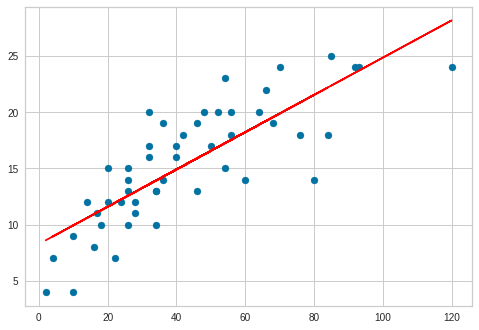

In [18]:
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = 'red')

#<font color="green">Previsão</font>

qual a velocidade se levou 22 pés para parar?

In [19]:
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [20]:
# previsao usando o predict
modelo.predict([[22]])

array([11.92639228])

Grafico para visualizar os residuais

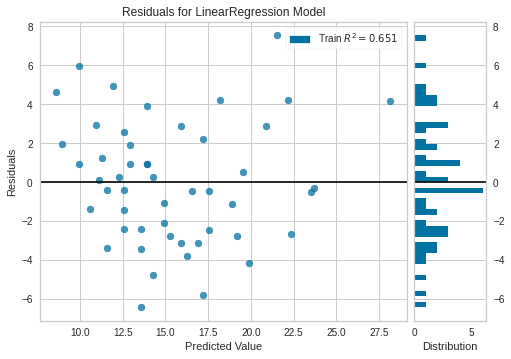

In [21]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x,y)
visualizador.poof()

In [22]:
import statsmodels.formula.api as sm 

In [25]:
carros = pd.read_csv("dados/mt_cars.csv")
carros.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [27]:
# excluir a coluna Unnamed: 0
carros = carros.drop(['Unnamed: 0'], axis=1)

Criação das variaveis x e y: variavel independente e variavel dependente

In [28]:
X = carros.iloc[:, 2].values # => coluna disp
y = carros.iloc[:, 0].values # => coluna mpg

Correlação

In [29]:
correlacao_mtcars = np.corrcoef(X, y)
correlacao_mtcars

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

Mudança do formato de x para o formato de matriz.

In [30]:
X = X.reshape(-1,1)

#<font color="orange">Criação do modelo - treinamento e visualização dos coeficientes e do score do modelo</font>

In [32]:
mtcars_model = LinearRegression()
mtcars_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Intercept
print(mtcars_model.intercept_)
# Inclinação
print(mtcars_model.coef_)

29.599854756163946
[-0.04121512]


Score R²

In [34]:
mtcars_model.score(X,y)

0.7183433404897299

Gerando Previsões

In [36]:
previsao = mtcars_model.predict(X)
previsao

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

Criação do modelo, utilizando a biblioteca statsmodel


In [39]:
model_ajustado = sm.ols(formula= "mpg ~ disp", data= carros)
model_treinado = model_ajustado.fit()
model_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           9.38e-10
Time:                        18:54:02   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

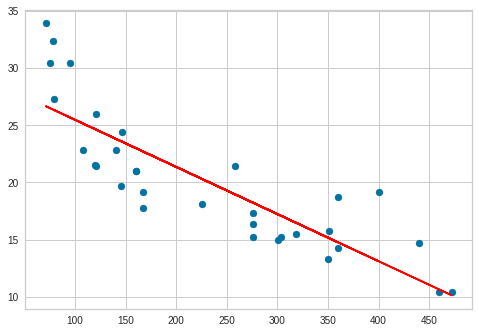

In [40]:
# Visualizando dos resultados
plt.scatter(X, y)
plt.plot(X, previsao, color = 'red')

Predict

In [41]:
mtcars_model.predict([[200]])

array([21.35683076])

# Regressão Linear Múltipla

Criação de novas variaveis X1 e y1 e novo modelo para comparação com o anterior
3 variaveis independente para prever mpg: cyl --> disp --> hp

In [42]:
X1 = carros.iloc[:, 1:4].values
y1 = carros.iloc[:, 0].values

In [45]:
model_mult = LinearRegression()
model_mult.fit(X1, y1)
# score
model_mult.score(X1, y1)

0.7678877440928638

Criação do modelo ajustado com mais atributos 

Usando stats model

In [48]:
model_ajust_mult = sm.ols(formula= 'mpg ~ cyl + disp + hp', data=carros)
model_trein_mult = model_ajust_mult.fit()
model_trein_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           5.05e-09
Time:                        19:09:51   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Previsao de um novo registro

In [51]:
novo = np.array([4, 200, 160])
novo = novo.reshape(1, -1)
model_mult.predict(novo)

array([23.15892877])

#<font color="Maroon">Regressão Logística</font>

In [52]:
from sklearn.linear_model import LogisticRegression

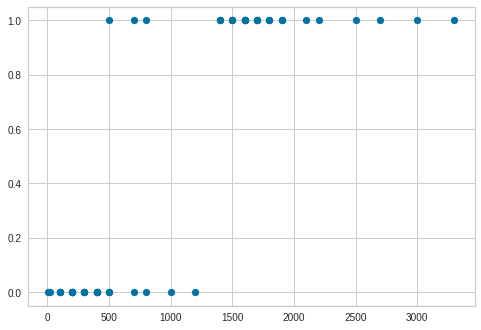

In [55]:
# dados
eleicao = pd.read_csv("dados/Eleicao.csv", sep=";")
plt.scatter(eleicao.DESPESAS, eleicao.SITUACAO)
plt.show()

Descrição do conjunto de Dados - Estatística Básica

In [56]:
eleicao.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


Correlação entre o atributo Despesas e Situação

In [57]:
np.corrcoef(eleicao.DESPESAS, eleicao.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

Criação das variaveis x e y (variavel independente e dependente)

Transformação de x para o formato de matriz adicionando um novo eixo (newaxis)

In [60]:
X = eleicao.iloc[:, 2].values
X = X[:, np.newaxis]
y = eleicao.iloc[:, 1].values

In [62]:
#X

Criação do modelo - Treinamento e visualização dos coeficientes

In [65]:
logic = LogisticRegression()
logic.fit(X,y)
print(logic.coef_)
print(logic.intercept_)

[[0.00498364]]
[-4.60287217]


Visualizando Graficamente

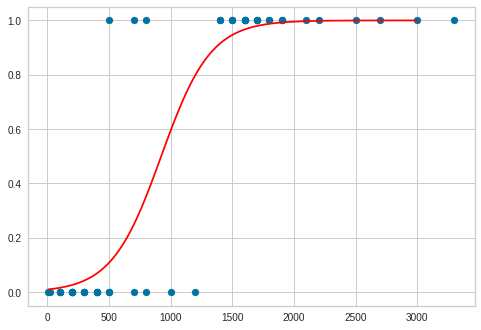

In [70]:
plt.scatter(X, y)
# Geração de dados para gerar a função sigmoid
X_teste = np.linspace(10, 3000, 100)
# Implementando a função sigmoid
def model(x):
  return 1 / (1 + np.exp(-x))
# Geração de previsoes (variavel r ) e visualização dos resultados
r = model(X_teste * logic.coef_ + logic.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')  

Previsão de novos candidatos

In [68]:
base_prever = pd.read_csv("dados/NovosCandidatos.csv", sep=";")

In [69]:
base_prever

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


Mudança dos dados para o formato de matriz

In [74]:
despesas = base_prever.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)


In [76]:
previsoes_teste = logic.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1])

In [78]:
base_prever = np.column_stack((base_prever, previsoes_teste))
base_prever

array([['A', 0, 0, 0],
       ['B', 10, 0, 0],
       ['C', 200, 0, 0],
       ['D', 500, 0, 0],
       ['E', 900, 0, 0],
       ['F', 1500, 1, 1],
       ['G', 3000, 1, 1]], dtype=object)